In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_pl = pd.read_csv('../../data/all_season/Liverpool_data_epl_match_details.csv')

In [5]:
df_ldc = pd.read_csv('../../data/all_season/Liverpool_data_ldc_match_details.csv')

In [6]:
df_ldc = df_ldc.rename(columns={'Diff_elo':'Elo_Diff',
                               'elo_liverpool':'Elo_Liverpool',
                               'elo_opponent':'Elo_Opponent',
                               'liverpool_result':'liverpool_result_ft',
                               'rest_days' : 'Rest_Days'})

In [7]:
df = df_ldc.append(df_pl[df_ldc.columns])

In [8]:
df = df.reset_index(drop=True)

#### On convertit le type des dates

In [9]:
df['date_match'] = pd.to_datetime(df['date_match'])

####  La journée de la saison correspondante

#### Si Liverpool est à domicile 0

In [10]:
df['home_0_away_1'] = df['at_anfield'].apply(lambda x : 0 if x else 1)

####  Nb points gagnes

In [11]:
df['points_won'] = df['liverpool_result_ft'].apply(lambda x : 0 if x == "D" else( 1  if x == "N" else 3))

#### Conversion de la possession pour pouvoir l'utiliser

In [12]:
df['Possession']=df['Possession'].str.replace('%','')
df['Possession']=df['Possession'].astype(int)

# All features corr

In [13]:
all_features = df.drop(columns=['date_match','home_team','away_team','season','liverpool_score_ft','opponent_score_ft',
                               'Goals','Assists','Penalties scored','Penalties won','at_anfield','points_won','Formation','contests'])

<AxesSubplot:>

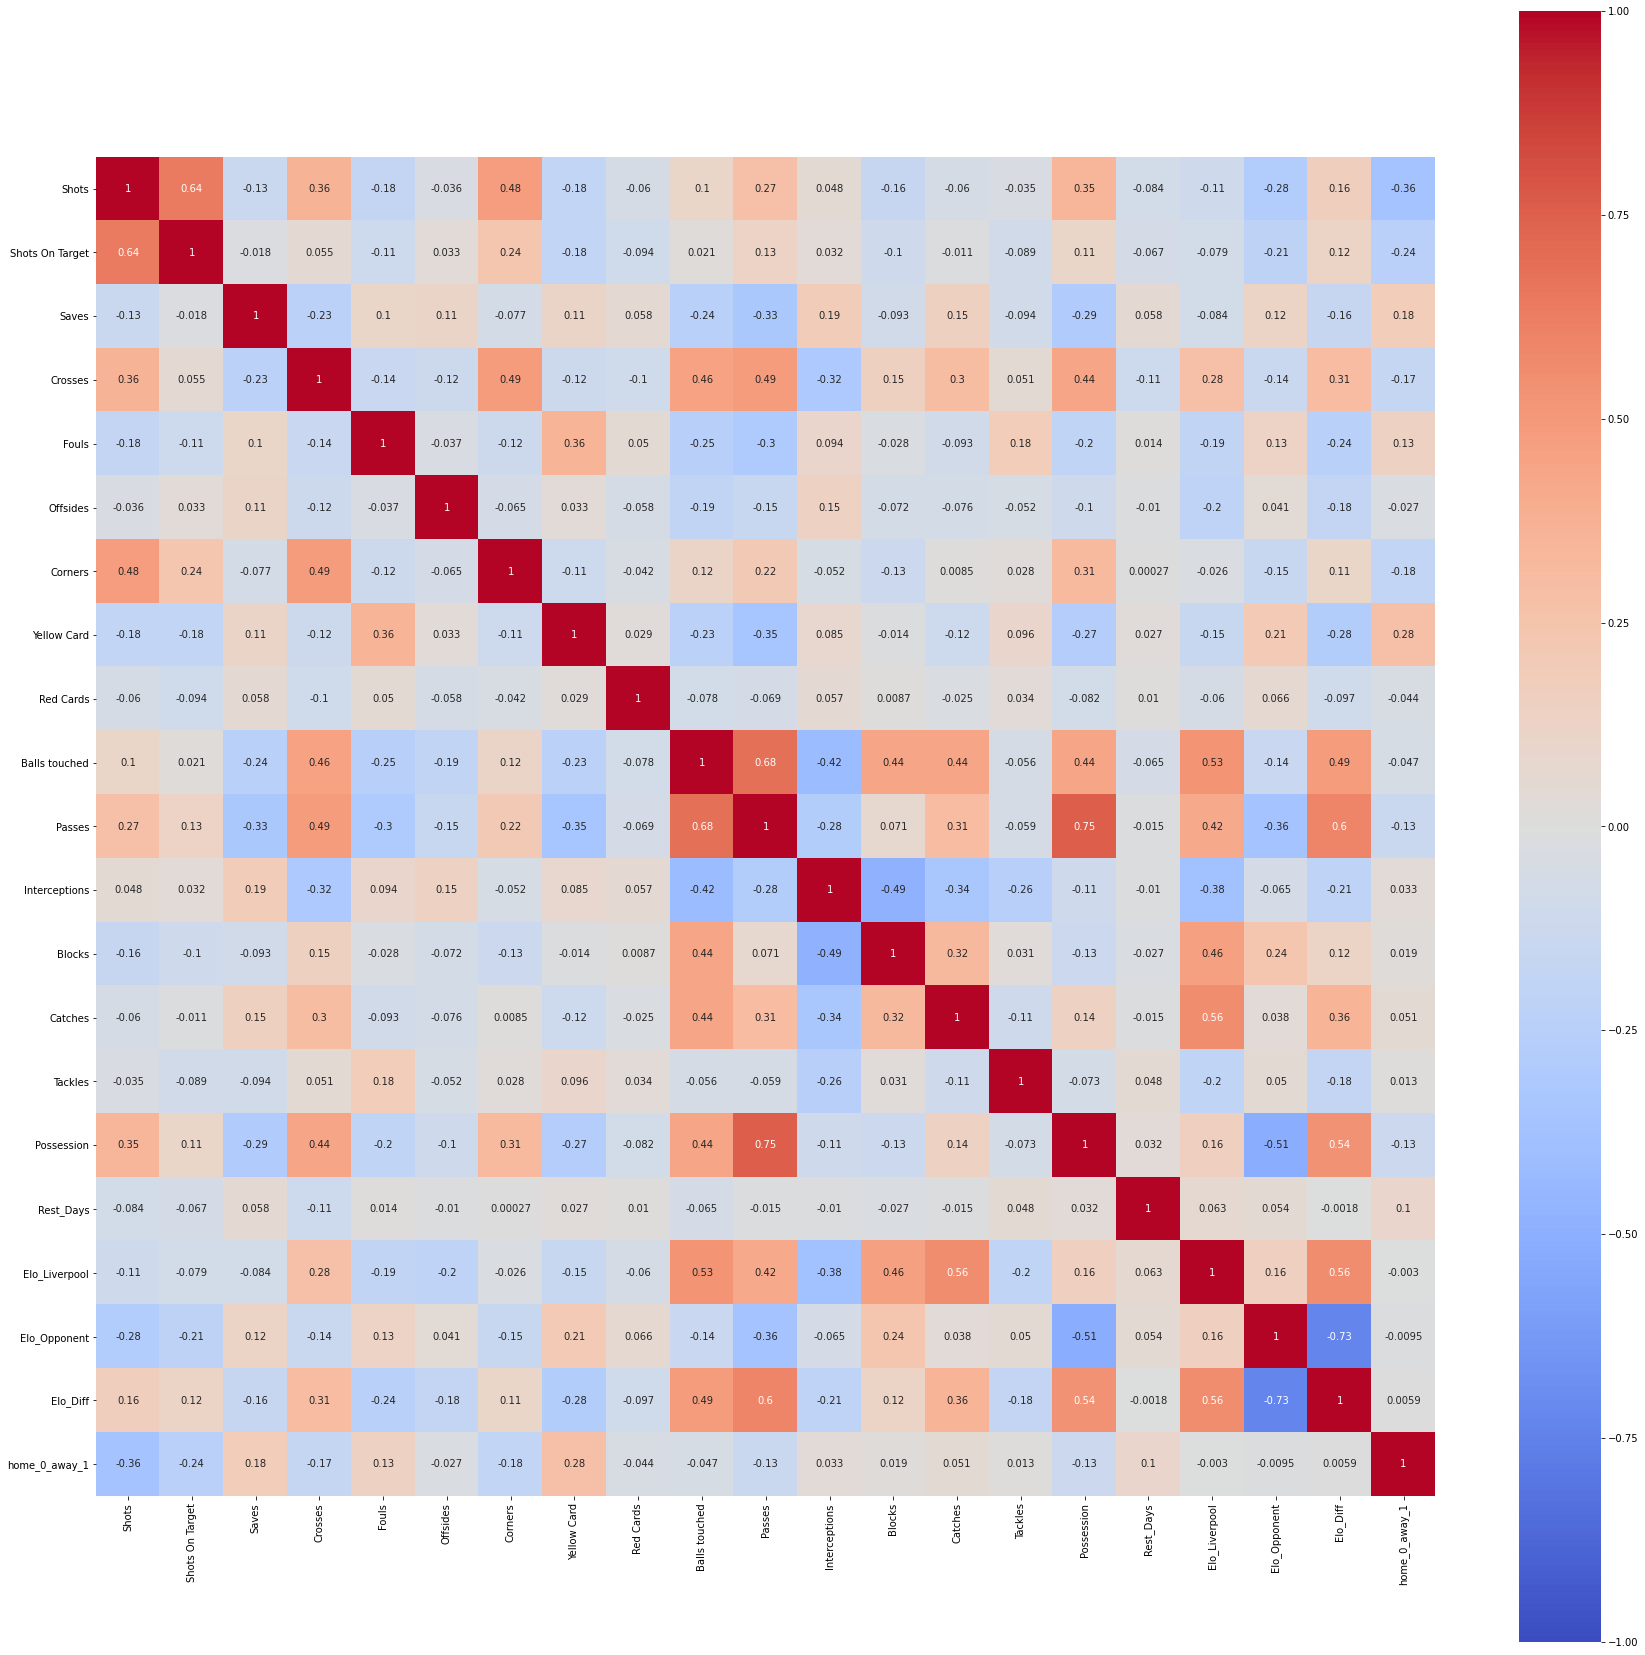

In [18]:
plt.figure(figsize=(30,30))
sns.heatmap(all_features.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True)
# plt.savefig('coor.jpg')

# Supression des variables avec un corr > 0.6

In [19]:
all_features = all_features.drop(columns=['Possession','Shots On Target','Elo_Opponent','Elo_Liverpool','Balls touched'])

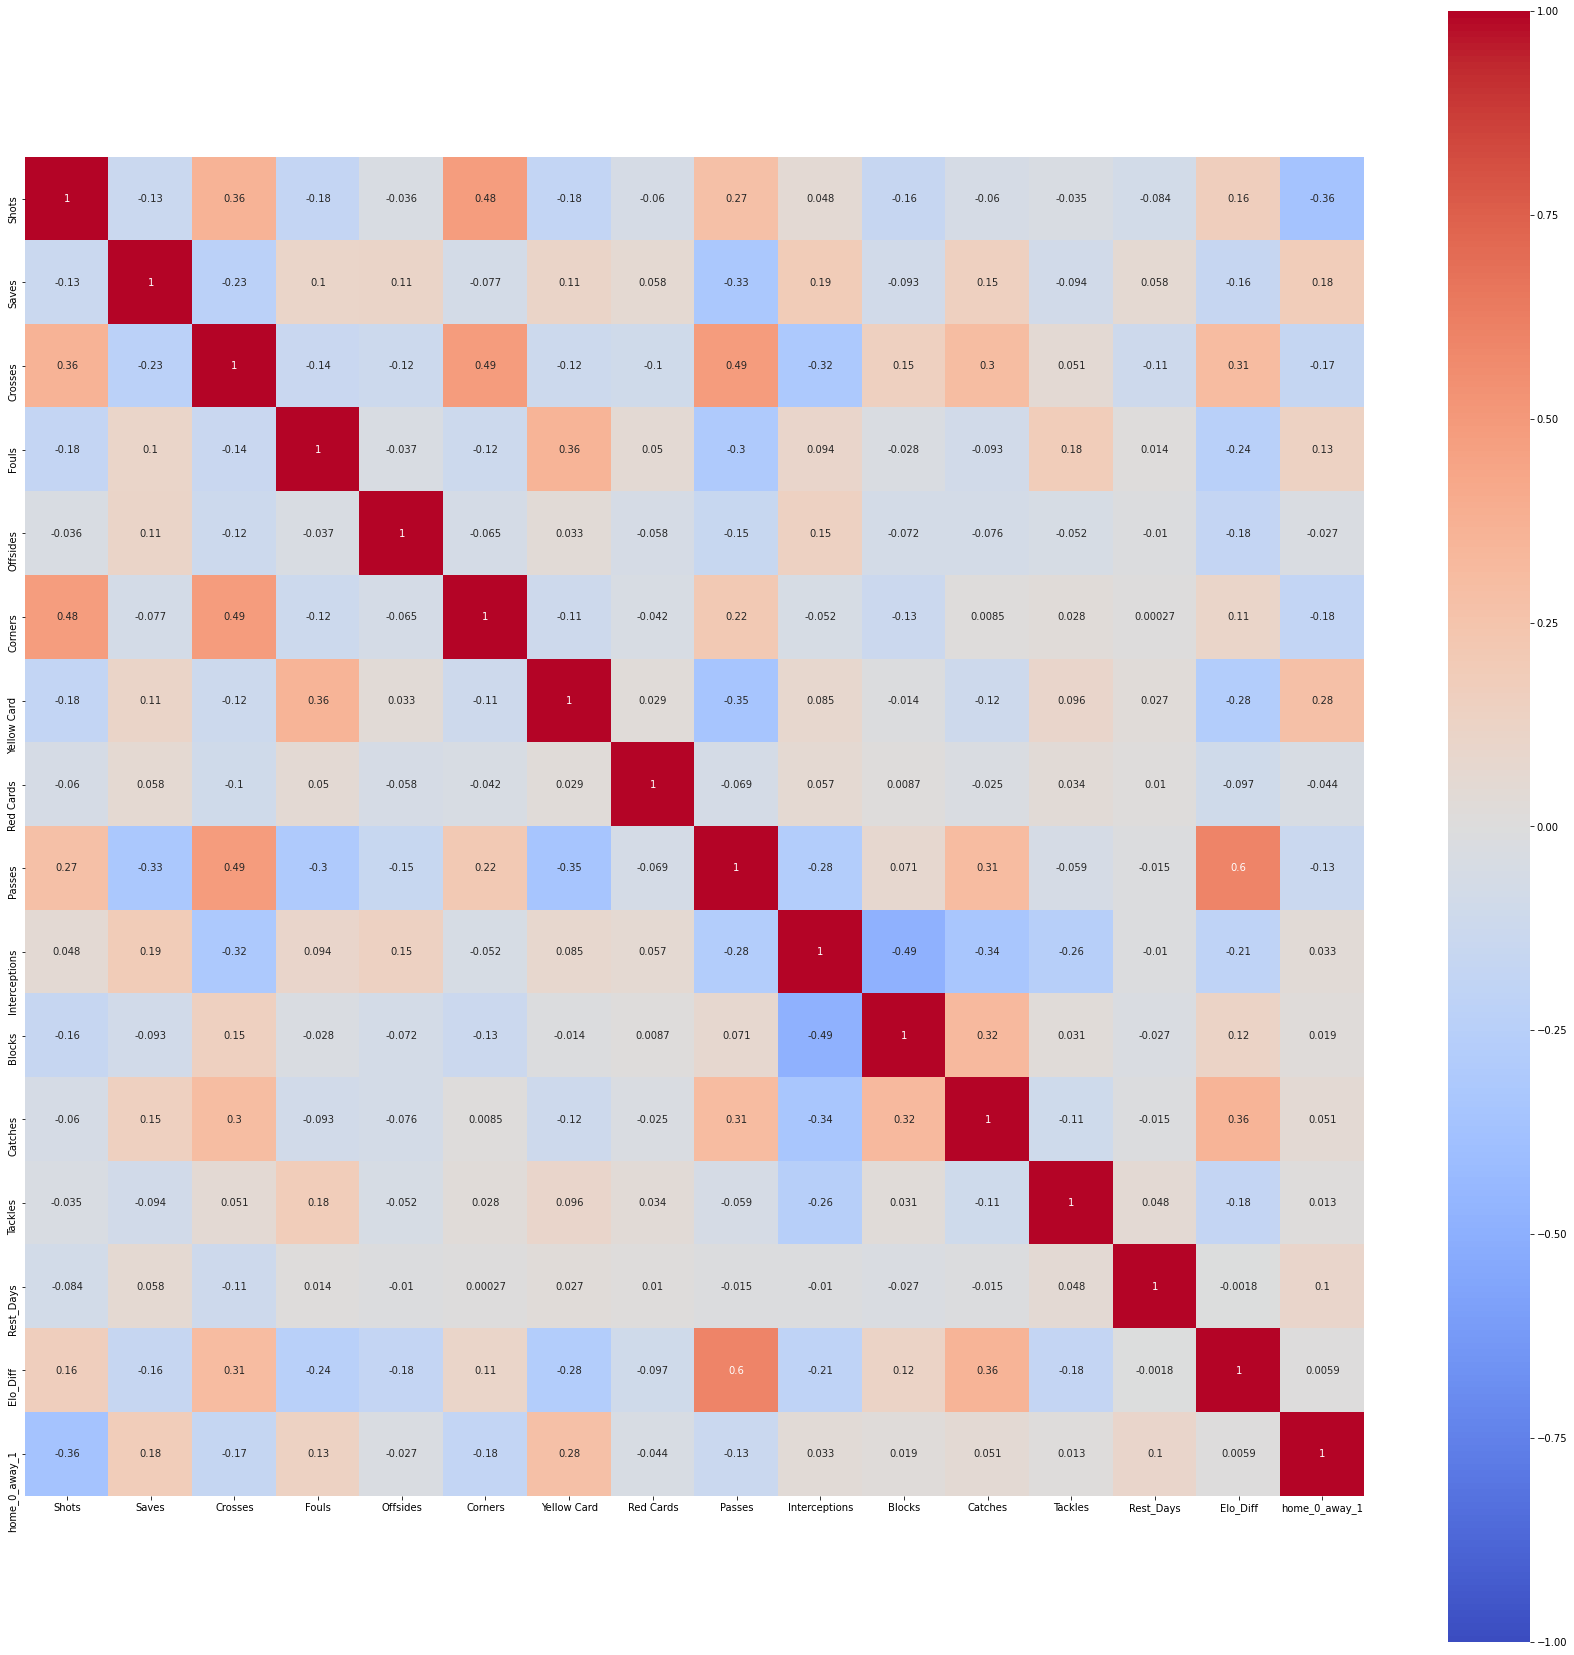

In [21]:
plt.figure(figsize=(30,30))
sns.heatmap(all_features.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);
plt.savefig('coor.jpg')

In [ ]:
all_features.to_csv('dataset.csv',index=False)